In [1]:
def perform_action(state, action):
    # Eylemi gerçekleştirerek yeni durumu, ödülü ve tamamlanma durumunu döndürme

    # Eylemi gerçekleştirme ve yeni durumu al
    if action == 0:  # Sol
        next_state = (state[0], max(0, state[1] - 1))
    elif action == 1:  # Sağ
        next_state = (state[0], min(2, state[1] + 1))
    elif action == 2:  # Yukarı
        next_state = (max(0, state[0] - 1), state[1])
    elif action == 3:  # Aşağı
        next_state = (min(2, state[0] + 1), state[1])

    # Yeni durumun değerini al
    new_state_value = env[next_state]

    # Ödül ve tamamlanma durumunu belirleme
    if new_state_value == -1:  # Engeli vurdu
        reward = -10
        done = True
    elif new_state_value == 1:  # Hedefe ulaştı
        reward = 10
        done = True
    else:
        reward = 0
        done = False

    return next_state, reward, done


In [2]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_trajectory(trajectory):
    # Oyun tahtası
    board = np.zeros((3, 3))

    # Durumları ve hareketleri tahtada işaretleme
    for state, _ in trajectory:
        board[state] = 0.5
    board[2, 2] = 1  # Hedef durumu işaretleme

    # Görselleştirme
    plt.imshow(board, cmap='Blues', origin='lower')
    plt.xticks(range(3))
    plt.yticks(range(3))
    plt.grid(color='black', linewidth=1.0)
    plt.title("Ajanın Hareketleri")
    plt.show()

In [3]:
import matplotlib.pyplot as plt
import time
import numpy as np

def visualize_trajectory_step_by_step(trajectory):
    # Oyun tahtası
    board = np.zeros((3, 3))

    # Görselleştirme
    fig, ax = plt.subplots(len(trajectory), 1, figsize=(6, 6 * len(trajectory)))
    fig.suptitle("Ajanın Hareketleri")

    for i, (state, _) in enumerate(trajectory):
        ax[i].set_xticks(range(3))
        ax[i].set_yticks(range(3))
        ax[i].grid(color='black', linewidth=1.0)
        ax[i].set_title(f"Adım {i+1}")

        board[state] = 0.5
        board[2, 2] = 1  # Hedef durumu işaretleme

        # Görseli güncelleme
        ax[i].imshow(board, cmap='Blues', origin='lower')

        # Durum etiketi ekleme
        for j in range(3):
            for k in range(3):
                ax[i].text(k, j, f"{j},{k}", ha="center", va="center", color="black", fontsize=12, fontweight='bold')

        # Tahtayı sıfırlama
        board[state] = 0

    plt.tight_layout()
    plt.show()

Durum: (1, 0), Ödül: 0
Durum: (2, 0), Ödül: 0
Durum: (2, 1), Ödül: 0
Durum: (2, 2), Ödül: 10
Öğrenme tamamlandı.


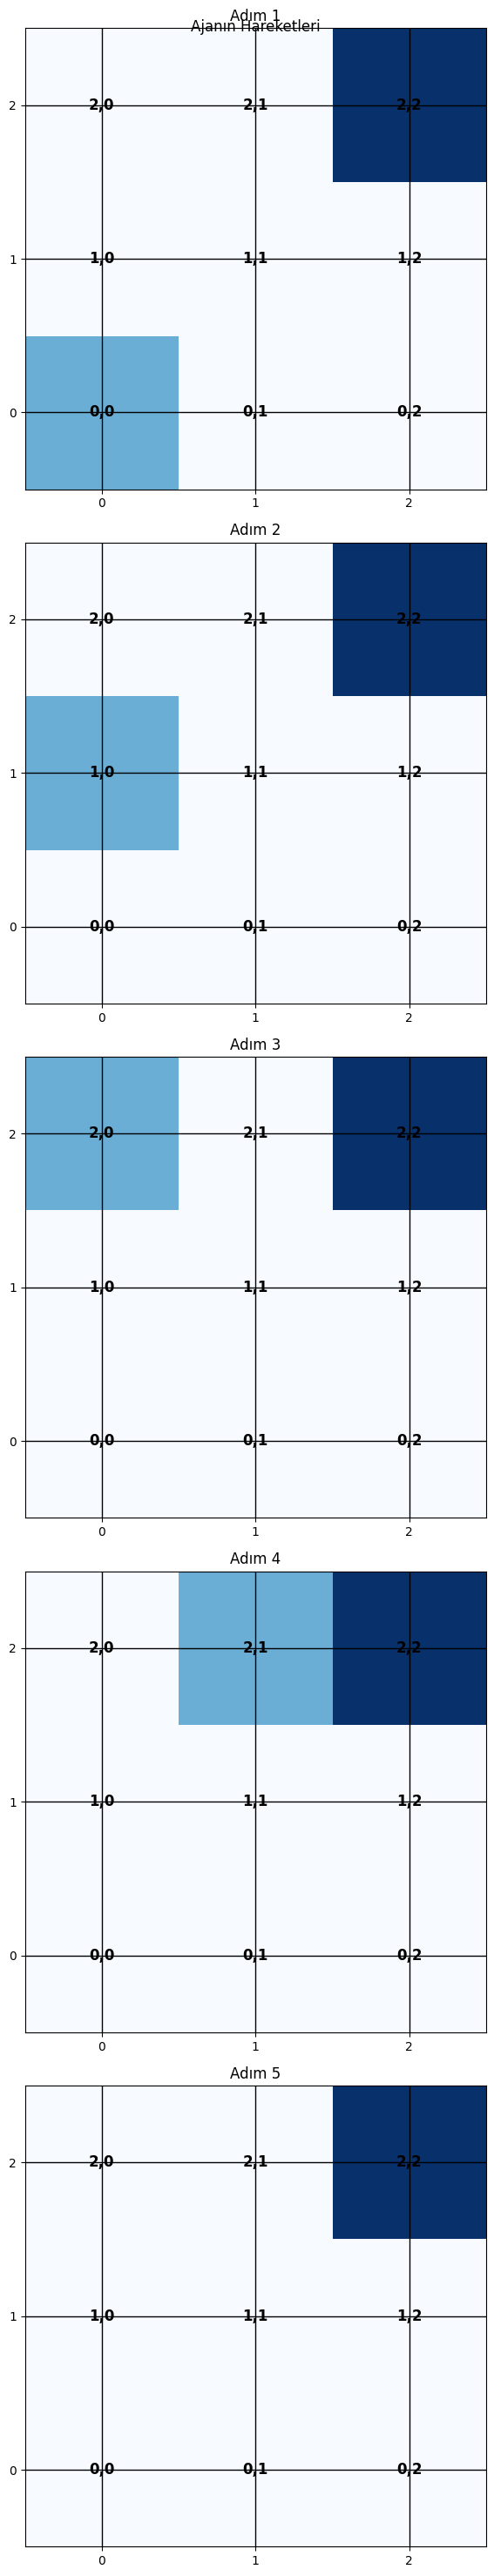

In [4]:
import numpy as np

# Oyun ortamı oluşturma
env = np.array([[0, 0, 0],
                [0, -1, 0],
                [0, 0, 1]])

# Q-tablosu başlangıç değerleri
q_table = np.zeros((3, 3, 4))

# Parametreler
learning_rate = 0.1
discount_factor = 0.9
num_episodes = 1000
epsilon = 0.1

# Eğitim döngüsü
for episode in range(num_episodes):
    state = (0, 0)  # Başlangıç durumu
    done = False

    while not done:
        # Eylem seçimi (epsilon-greedy)
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.choice(4)  # Rastgele eylem seçimi
        else:
            action = np.argmax(q_table[state])  # En iyi eylem seçimi

        # Eylem gerçekleştirme ve yeni durumu al
        next_state, reward, done = perform_action(state, action)

        # Q-tablosu güncelleme
        q_table[state][action] = (1 - learning_rate) * q_table[state][action] + learning_rate * (reward + discount_factor * np.max(q_table[next_state]))

        state = next_state

# Test etme döngüsü
state = (0, 0)
done = False
trajectory = [(state, 0)]

while not done:
    action = np.argmax(q_table[state])
    next_state, reward, done = perform_action(state, action)
    state = next_state
    trajectory.append((state, reward))
    # Durumu görselleştirme
    print(f"Durum: {state}, Ödül: {reward}")

print("Öğrenme tamamlandı.")
visualize_trajectory_step_by_step(trajectory)

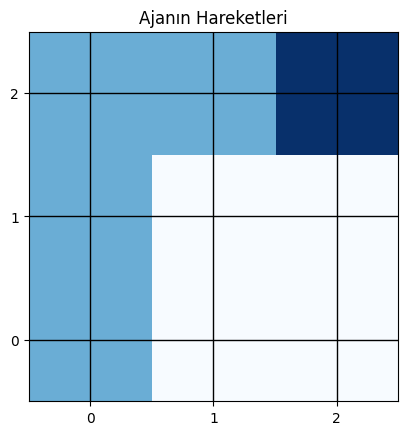

In [20]:
visualize_trajectory(trajectory)